# Vaccine Usage Prediction

## Problem Statement
The data set is the response of people to the h1n1 flu vaccine related questionnaire. The respondents are people of age 6 months and older. This survey was designed to monitor the influenza immunization coverage in 2009-10 season. Machine learning techniques may aid a more efficient analysis in the prediction of how likely the people are to opt for the flu vaccine. In this case study, we predict, how likely it is that the people will take a H1N1 flu vaccine.

### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#supress the warnings
from warnings import filterwarnings
filterwarnings("ignore")

#import 'is_string_dtype' to check if the type of input is string
from pandas.api.types import is_string_dtype

#import functions to perform Logistic regression
import statsmodels
import statsmodels.api as sm

In [3]:
#set the plot size using 'rcParams'
#once the plot size is set using 'rcParam', it sets the size of all the forthcoming plots in the file
#pass width and height in inches to 'figure.figsize'
plt.rcParams['figure.figsize']=[15,8]

In [4]:
#display all columns of the dataframe
pd.options.display.max_columns=None #None for No limit

#display all rows of the dataframe
pd.options.display.max_rows=50 

#use below code to convert the 'exponential' values for float
np.set_printoptions(suppress=True)

# Read Data

In [5]:
import os 
os.getcwd()

'C:\\Users\\akash\\Desktop\\Python Imarticus\\PGAA-8 UCLA\\PRACTICE'

In [6]:
#read the csv data file
data_vaccine=pd.read_csv(r"h1n1_vaccine_prediction.csv")

In [7]:
data_vaccine.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [8]:
data_vaccine.shape

(26707, 34)

## Data Analysis 

In [9]:
#to understand the each attribute of our data, it is always good us to know the data type of each columns
data_vaccine.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
m

In [10]:
data_vaccine.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

In [11]:
for col in ['h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine']:
    #use astype() to change the data type
    data_vaccine[col]=data_vaccine[col].astype('object')

In [12]:
#rechecking the data types after the covesions
data_vaccine.dtypes

unique_id                     int64
h1n1_worry                   object
h1n1_awareness               object
antiviral_medication         object
contact_avoidance            object
bought_face_mask             object
wash_hands_frequently        object
avoid_large_gatherings       object
reduced_outside_home_cont    object
avoid_touch_face             object
dr_recc_h1n1_vacc            object
dr_recc_seasonal_vacc        object
chronic_medic_condition      object
cont_child_undr_6_mnths      object
is_health_worker             object
has_health_insur             object
is_h1n1_vacc_effective       object
is_h1n1_risky                object
sick_from_h1n1_vacc          object
is_seas_vacc_effective       object
is_seas_risky                object
sick_from_seas_vacc          object
age_bracket                  object
qualification                object
race                         object
sex                          object
income_level                 object
marital_status              

In [13]:
#Dropping the 'unique_id'
#axis =1: it stands for column
#inplace=True : it perform operations on original data
data_vaccine.drop('unique_id', axis =1, inplace =True)

In [14]:
data_vaccine.shape

(26707, 33)

In [15]:
#spilitting features and the target variable
#consider all the column except 'h1n1_vaccine' using 'iloc'
X=data_vaccine.iloc[:,data_vaccine.columns != 'h1n1_vaccine']

#consider the target variable
Y=data_vaccine.iloc[:,data_vaccine.columns == 'h1n1_vaccine']


In [16]:
Y

,h1n1_vaccine
0,0
1,0
2,0
3,0
4,0
...,...
26702,0
26703,0
26704,0
26705,0


In [17]:
#the describe() returns the statistical summary of the variables
#by default, it returns the summary of all categorical variables as there are no numerical variables in the dataset
#use transpose() for better  readability, however it's optional
data_vaccine.describe().transpose()

,count,unique,top,freq
h1n1_worry,26615.0,4.0,2.0,10575.0
h1n1_awareness,26591.0,3.0,1.0,14598.0
antiviral_medication,26636.0,2.0,0.0,25335.0
contact_avoidance,26499.0,2.0,1.0,19228.0
bought_face_mask,26688.0,2.0,0.0,24847.0
wash_hands_frequently,26665.0,2.0,1.0,22015.0
avoid_large_gatherings,26620.0,2.0,0.0,17073.0
reduced_outside_home_cont,26625.0,2.0,0.0,17644.0
avoid_touch_face,26579.0,2.0,1.0,18001.0
dr_recc_h1n1_vacc,24547.0,2.0,0.0,19139.0


#### The summary contains information about the total number if observations, number of unique classes, 
#### the most occuring class and frequency of the same.

#### Let us consider the 'h1n1_worry' variables to see the statistics-count: Number of observations i.e.26615
#### unique: Number of unique values or classes in the variable i.e. it has 4 classes in it.
#### top : The most occuring class in the variable is 2
#### frequency : Frequency of the most repeated class; out of 20000 observations 0 has a frequency of 10575 <br>

-----------------------------------------------------------------------------------------------
### Distribution of variables
1) Distribution of numeric independent variables <br>
2) Distribution of categoric independent variables<br>
3) Distibution of dependent variable<br>

##### 1)Distribution of numeric independent variables
Since there are no independent numeric variables, we skip this step

##### 2)Distribution of categorical independent variables
For the independent categorical variables, we plot the bar plot to check the distribution of each variables.

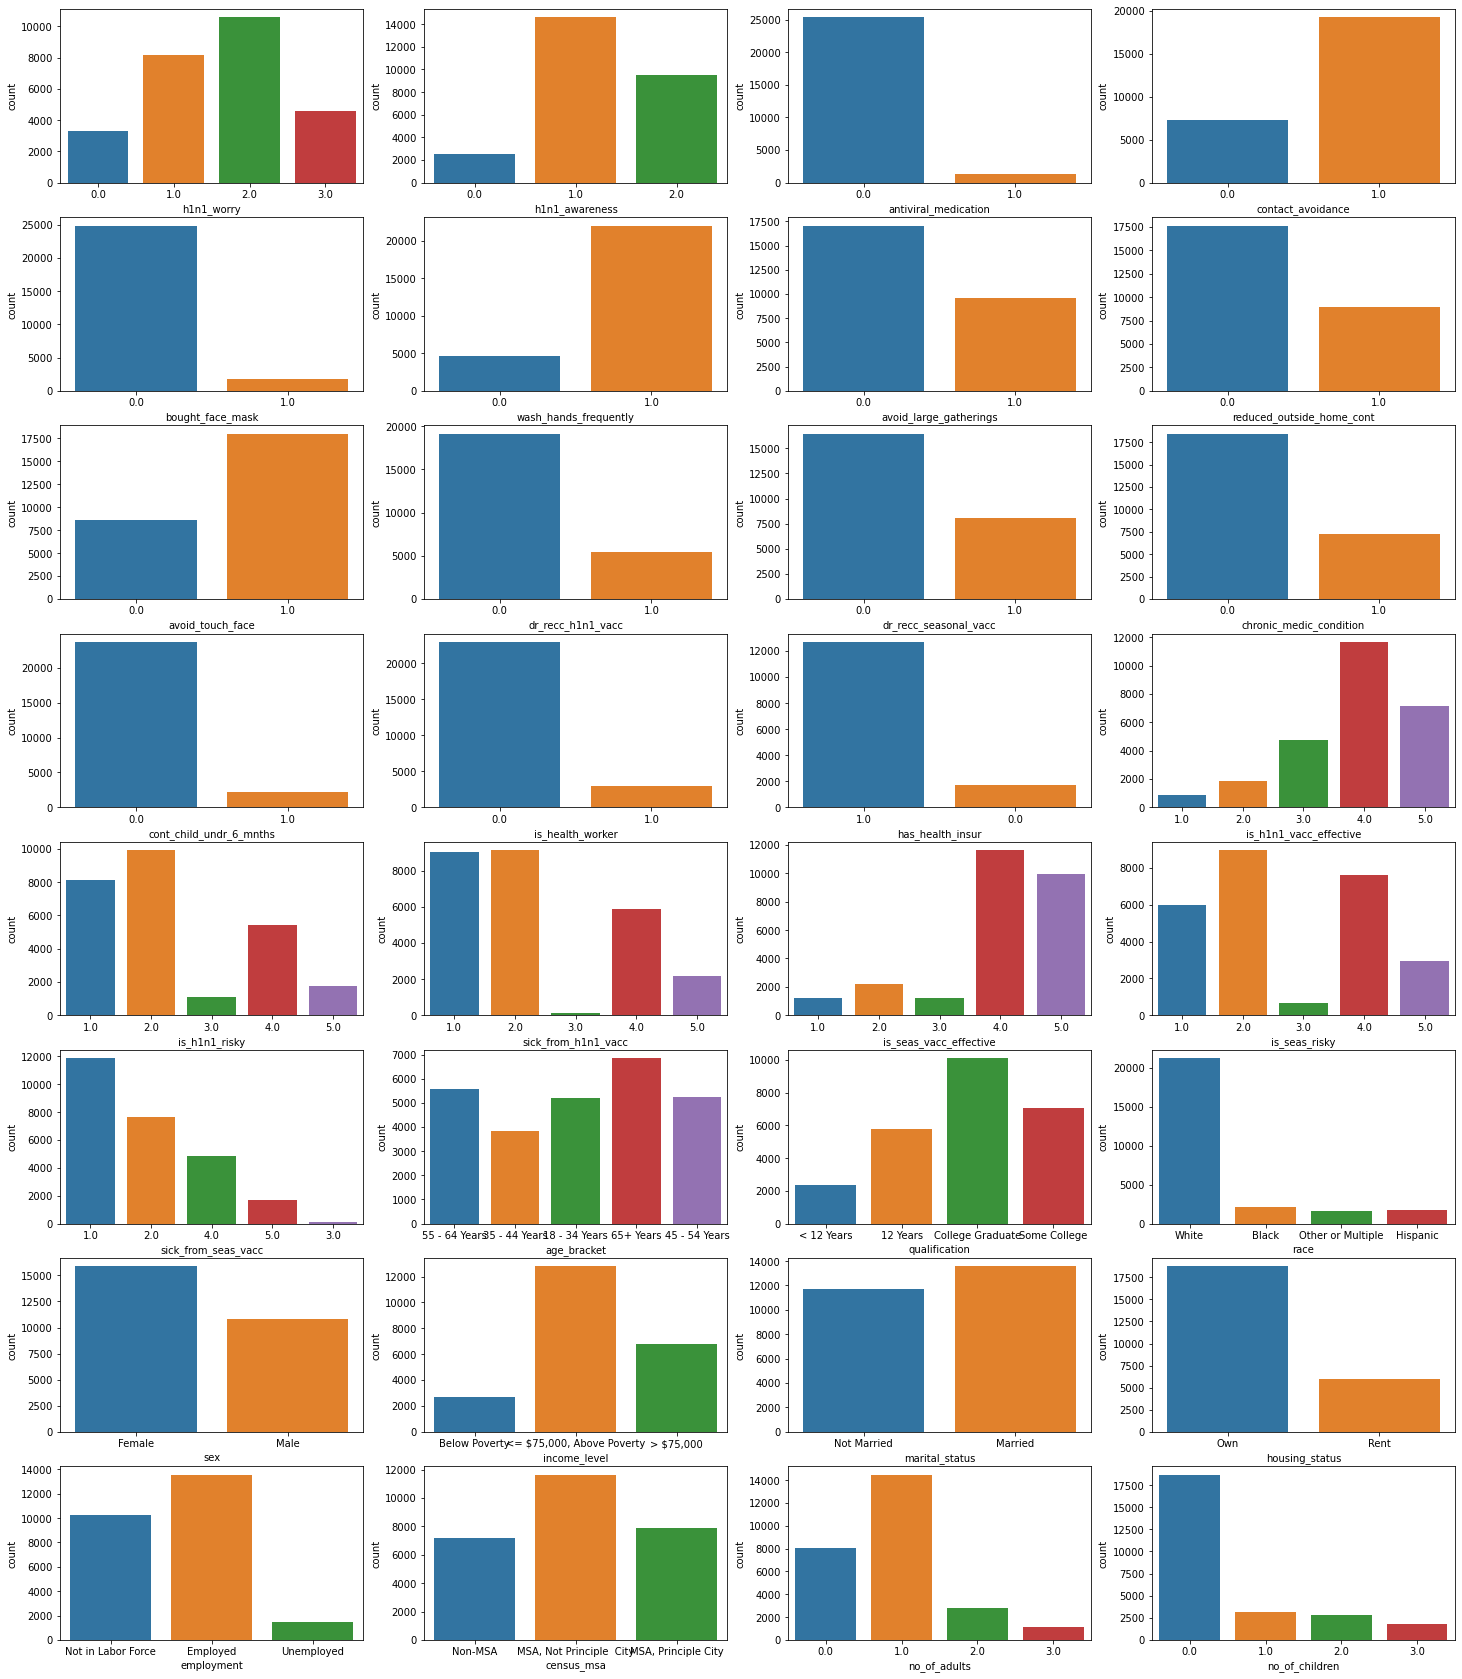

In [18]:
#create a list of all categorical variables 
#initiate an empty list to store the categorical variables
categorical=[]
#use for loop to check the datatype of each variables
for column in X:
    #use 'if' statement with condition to check the categorical type
    if is_string_dtype(X[column]):
        #aapend the variables with 'categoric' data type in the list 'categorical'
        categorical.append(column)
        
#plot the count plot for each categorical variable
#set the number of rows in the subplot using the parameter, 'nrows'
#set the number of columns in the subplot using the parameter, 'ncols'
#'figsize' sets the figure size

fig, ax=plt.subplots(nrows=8,ncols=4, figsize=(25,30))

#use for loop to plot the count plot for each variable
for variable, subplot in zip(categorical, ax.flatten()):
    
    #use countplot() to plot for each variable
    #pass the axes for the plot to the parameter, 'ax'
    sns.countplot(data_vaccine[variable],ax=subplot)
    
#display the plot
plt.show()

Most of the vairables are binary, A few variables have 3,4 and even 5 categorical, as seen above

### Distribution of independent variable.

In [19]:
#get counts of 0's and 1's in the 'h1n1_vaccine' variables using 'value_counts()'
#store the values in 'class frequency'
class_frequency =data_vaccine.h1n1_vaccine.value_counts()
class_frequency

0    21033
1     5674
Name: h1n1_vaccine, dtype: int64

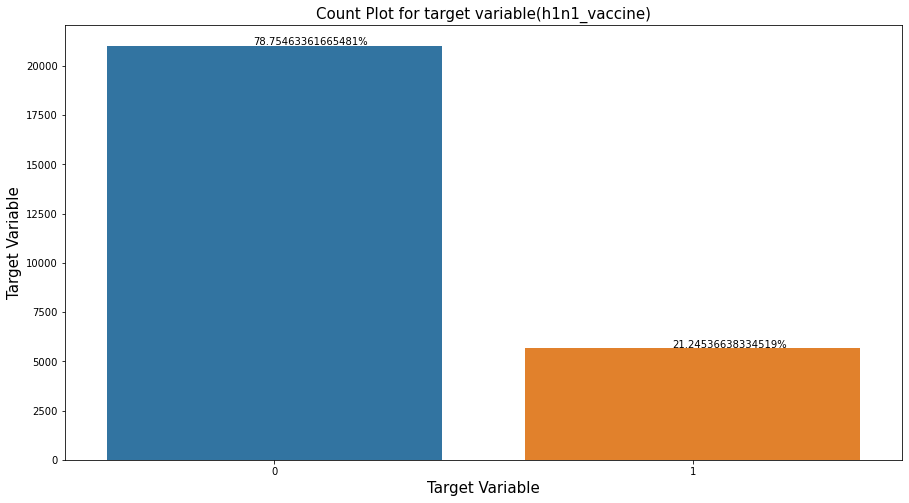

In [20]:
#plot the count plot of the variables 'h1n1_vaccine'
sns.countplot(x=Y.h1n1_vaccine)

#use below code to print the values in the graph
#'x' and 'y' gives position of the next
#'s' is the text on the plot
plt.text(x = -0.05, y = Y.h1n1_vaccine.value_counts()[0] + 30, s = str((class_frequency[0])*100/len(Y.h1n1_vaccine)) + '%')
plt.text(x = 0.95, y = Y.h1n1_vaccine.value_counts()[1] +20, s = str((class_frequency[1])*100/len(Y.h1n1_vaccine)) + '%')


#add plot and axes label
#set text size using 'fontsize'

plt.title('Count Plot for target variable(h1n1_vaccine)', fontsize=15)
plt.xlabel('Target Variable',fontsize=15)
plt.ylabel('Target Variable', fontsize=15)

#display the plot
plt.show()
         

#### There are total of 26707 respondents who do not have taken the survey, and 5674 have taken the h1n1 flu vaccine. we see that tha data set imbalanced between the two classes of the target variable

#### Missing values

First, run and check for the presence of missing values and their percentage for each columns. Then choose the right approach to remove them.

In [21]:
#sort the variables on the basis of total null values in the variable
#isnull().sum() returns the number of missing values in each variables
#'ascending = False' sort values in ascnending order
Total=data_vaccine.isnull().sum().sort_values(ascending=False)

#claculate the percentage of missing values 

Percent=(data_vaccine.isnull().sum()*100/data_vaccine.isnull().count()).sort_values(ascending=False)

#concat the 'Total' and 'Percent' columns using 'concat' function
#'keys' is the list of column names
#'axis=1' concats along the columns
missing_data=pd.concat([Total, Percent], axis=1, keys=['Total','Percentage of missing values'])
missing_data


,Total,Percentage of missing values
has_health_insur,12274,45.957989
income_level,4423,16.561201
dr_recc_h1n1_vacc,2160,8.087767
dr_recc_seasonal_vacc,2160,8.087767
housing_status,2042,7.645936
employment,1463,5.477965
marital_status,1408,5.272026
qualification,1407,5.268282
chronic_medic_condition,971,3.635751
cont_child_undr_6_mnths,820,3.070356


Plotting a heatmap to visualize the null values

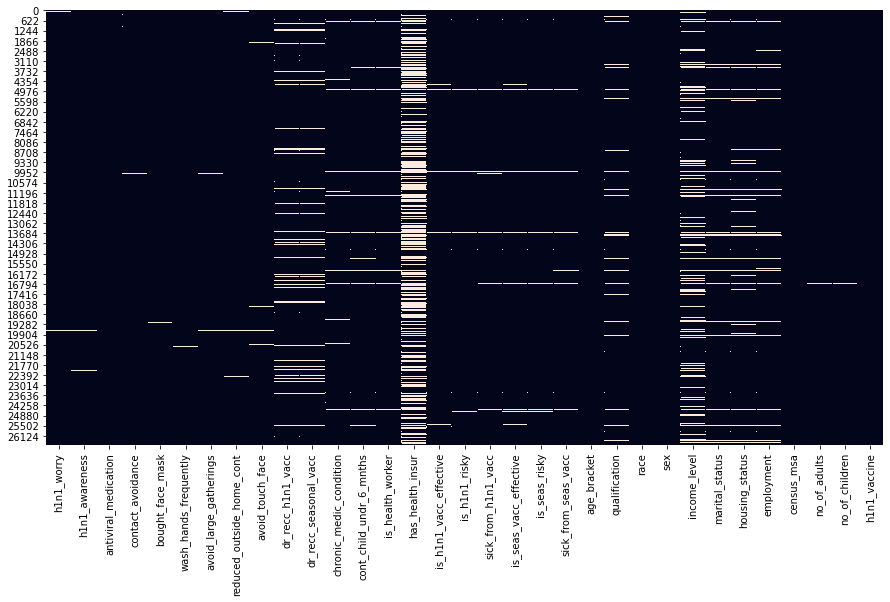

In [22]:
#plot heatmao to check null values
#'cbar=False' does not show the color axis
sns.heatmap(data_vaccine.isnull(),cbar=False)

#display the plot
plt.show()

#### The horizontal line in the heatmao correspond to the missing values<br>

<table align="left">
    <tr>
        <td width="8%">
            <img src="quicktip.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>How to deal with missing data?<br><br>


Drop data<br>
a. Drop the whole row<br>
b. Drop the whole column<br><br>

Replace data<br>

a. Replace it by mean<br>

b. Replace it by frequency<br>
c. Replace it based on other functions<br><br>

Whole columns should be dropped only if most entries in the column are empty. In our dataset, column has_health_insur has almost 46% missing values. Column income_level has 16% missing values. Hence dropping these two columns. Also columns dr_recc_h1n1_vacc and dr_recc_seasonal_vacc have 8% missing values. Has these two columns mostly tell about doctor's recommendation and not about the respondents, I choose to drop these two columns as well. As a execrcise we can re-run the model with these two columns later.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [23]:
data_vaccine.drop(['has_health_insur','income_level','dr_recc_h1n1_vacc','dr_recc_seasonal_vacc'],axis=1,inplace=True)

In [24]:
data_vaccine.shape

(26707, 29)

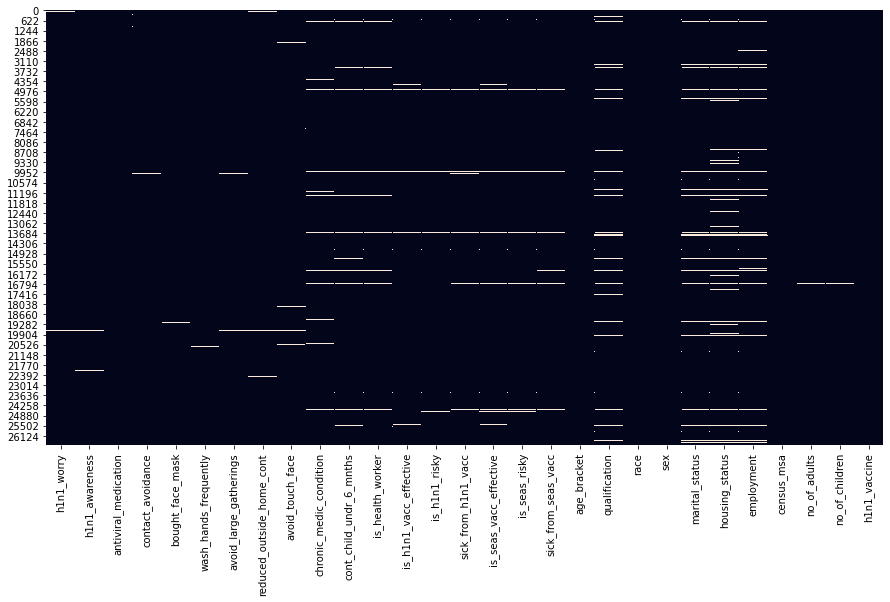

In [25]:
sns.heatmap(data_vaccine.isnull(),cbar=False)
plt.show()

In [26]:
data_vaccine.isnull().sum()

h1n1_worry                     92
h1n1_awareness                116
antiviral_medication           71
contact_avoidance             208
bought_face_mask               19
wash_hands_frequently          42
avoid_large_gatherings         87
reduced_outside_home_cont      82
avoid_touch_face              128
chronic_medic_condition       971
cont_child_undr_6_mnths       820
is_health_worker              804
is_h1n1_vacc_effective        391
is_h1n1_risky                 388
sick_from_h1n1_vacc           395
is_seas_vacc_effective        462
is_seas_risky                 514
sick_from_seas_vacc           537
age_bracket                     0
qualification                1407
race                            0
sex                             0
marital_status               1408
housing_status               2042
employment                   1463
census_msa                      0
no_of_adults                  249
no_of_children                249
h1n1_vaccine                    0
dtype: int64

In [27]:
#data_vaccine.dropna(axis=0,inplace=True)
#replace the missing values with mode values
for value in ['h1n1_worry','h1n1_awareness','antiviral_medication','contact_avoidance','bought_face_mask',
             'wash_hands_frequently','avoid_large_gatherings','reduced_outside_home_cont','avoid_touch_face',
             'chronic_medic_condition','cont_child_undr_6_mnths','is_health_worker','is_h1n1_vacc_effective','is_h1n1_risky','sick_from_h1n1_vacc',
             'is_seas_vacc_effective','is_seas_risky','sick_from_seas_vacc','qualification','marital_status','housing_status',
             'employment','no_of_adults', 'no_of_children']:
    data_vaccine[value].fillna(data_vaccine[value].mode()[0],inplace=True)

In [28]:
#code for fill the missing values automatically finding out by itself and don't need to
#assign variables name and it goes automatically and treat whether it is any form of data type.
"""
for x in data_vaccine.columns:
    if data_vaccine[x].dtype=='object' or data_vaccine[x].dtype=='bool':
        data_vaccine[x].fillna(data_vaccine[x].mode()[0],inplace=True)
    elif data_vaccine[x].dtype=='int64' or data_vaccine[x].dtype=='float64':
        data_vaccine[x].fillna(data_vaccine[x].mean(),inplace=True)
"""

"\nfor x in data_vaccine.columns:\n    if data_vaccine[x].dtype=='object' or data_vaccine[x].dtype=='bool':\n        data_vaccine[x].fillna(data_vaccine[x].mode()[0],inplace=True)\n    elif data_vaccine[x].dtype=='int64' or data_vaccine[x].dtype=='float64':\n        data_vaccine[x].fillna(data_vaccine[x].mean(),inplace=True)\n"

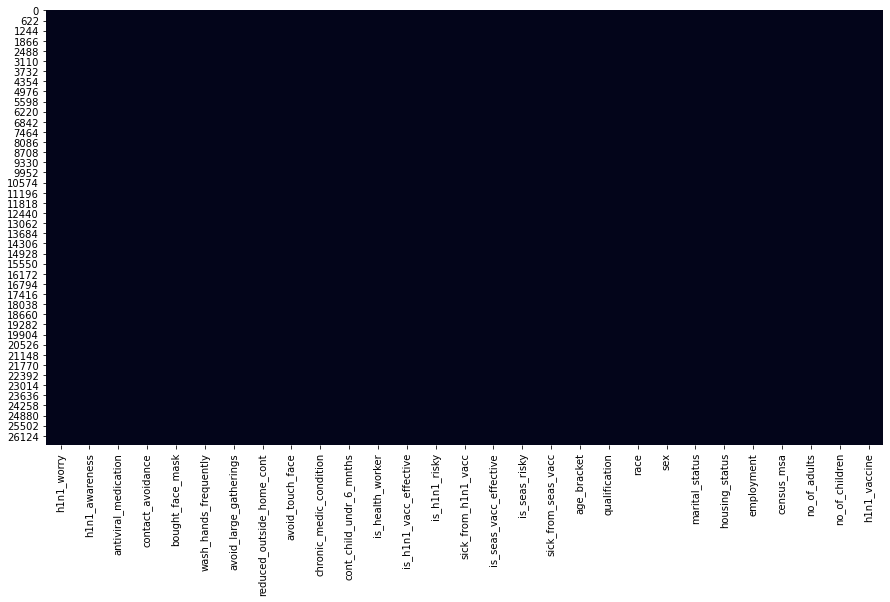

In [29]:
#After replacing the null values for both the variabels, recheck the null values
sns.heatmap(data_vaccine.isnull(),cbar=False)
plt.show()

In [30]:
data_vaccine.isnull().sum()

h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_children               0
h1n1_vaccine                 0
dtype: int64

#### Prepare the data

In [31]:
# conversion of categorical column 
#collecting the categorical variables in 'colname'
colname=[]
for x in data_vaccine.columns:
    if data_vaccine[x].dtype=='object':
        colname.append(x)
colname        

['age_bracket',
 'qualification',
 'race',
 'sex',
 'marital_status',
 'housing_status',
 'employment',
 'census_msa',
 'h1n1_vaccine']

In [32]:
#preprocessing the data
from sklearn import preprocessing

le=preprocessing.LabelEncoder()

for x in colname:
    data_vaccine[x]=le.fit_transform(data_vaccine[x])

In [33]:
data_vaccine.head()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,sex,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,3,1,3,0,1,0,1,2,0.0,0.0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,5.0,4.0,4.0,4.0,2.0,4.0,1,0,3,1,1,1,0,0,0.0,0.0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,1.0,1.0,4.0,1.0,2.0,0,2,3,1,1,0,0,0,2.0,0.0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,3.0,5.0,5.0,4.0,1.0,4,0,3,0,1,1,1,1,0.0,0.0,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,3.0,3.0,2.0,3.0,1.0,4.0,2,3,3,0,0,0,0,0,1.0,0.0,0


In [34]:
data_vaccine.dtypes

h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                    int32
qualification                  int32
race                           int32
sex                            int32
marital_status                 int32
housing_status                 int32
employment                     int32
census_msa                     int32
no_of_adults                 float64
n

### Splitting the dataset into Independent variable and dependent variable

In [35]:
X=data_vaccine.iloc[:,0:-1].values
Y=data_vaccine.iloc[:,-1].values

In [75]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(X)

x=scaler.transform(X)
print(X)


[[1. 0. 0. ... 2. 0. 0.]
 [3. 2. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 2. 0.]
 ...
 [2. 2. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 2. 1. 0.]
 [0. 0. 0. ... 1. 1. 0.]]


#### Model Building

In [76]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3, random_state=10)

In [77]:
from sklearn.linear_model import LogisticRegression

#create a model
classifier=LogisticRegression()
#fitting the training data into model
classifier.fit(X_train,Y_train)

#predtction
Y_pred=classifier.predict(X_test)

In [78]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model:",acc)

[[6048  271]
 [1166  528]]
              precision    recall  f1-score   support

           0       0.84      0.96      0.89      6319
           1       0.66      0.31      0.42      1694

    accuracy                           0.82      8013
   macro avg       0.75      0.63      0.66      8013
weighted avg       0.80      0.82      0.79      8013

Accuracy of the model: 0.8206664170722576


### Adjusting the threshold

In [79]:
#store the predicted probabilities
y_pred_prob=classifier.predict_proba(X_test)
print(y_pred_prob)

[[0.63008204 0.36991796]
 [0.69582291 0.30417709]
 [0.85082062 0.14917938]
 ...
 [0.90336549 0.09663451]
 [0.41231822 0.58768178]
 [0.49257853 0.50742147]]


In [86]:
y_pred_class=[]
for value in y_pred_prob[:,1]:
    if value>0.195:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)
print(y_pred_class)

[1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 

In [87]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cfm=confusion_matrix(Y_test,y_pred_class)
print(cfm)
acc=accuracy_score(Y_test,y_pred_class)
print("Accuracy of the model:",acc)

print("Classification report : ")
print(classification_report(Y_test,y_pred_class))

[[4327 1992]
 [ 439 1255]]
Accuracy of the model: 0.6966179957568951
Classification report : 
              precision    recall  f1-score   support

           0       0.91      0.68      0.78      6319
           1       0.39      0.74      0.51      1694

    accuracy                           0.70      8013
   macro avg       0.65      0.71      0.64      8013
weighted avg       0.80      0.70      0.72      8013



In [82]:
#checking the threshold
for a in np.arange(0.3,0.61,0.01):
    predict_mine=np.where(y_pred_prob[:,1]>a, 1, 0)
    cfm=confusion_matrix(Y_test,predict_mine)
    total_err=cfm[0,1]+cfm[1,0]
    print("Errors at threshold", a, ":", total_err, ", type 2 error :",
         cfm[1,0],", type 1 error :", cfm[0,1])

Errors at threshold 0.3 : 1788 , type 2 error : 745 , type 1 error : 1043
Errors at threshold 0.31 : 1753 , type 2 error : 775 , type 1 error : 978
Errors at threshold 0.32 : 1708 , type 2 error : 797 , type 1 error : 911
Errors at threshold 0.33 : 1682 , type 2 error : 818 , type 1 error : 864
Errors at threshold 0.34 : 1645 , type 2 error : 842 , type 1 error : 803
Errors at threshold 0.35000000000000003 : 1610 , type 2 error : 861 , type 1 error : 749
Errors at threshold 0.36000000000000004 : 1573 , type 2 error : 878 , type 1 error : 695
Errors at threshold 0.37000000000000005 : 1556 , type 2 error : 898 , type 1 error : 658
Errors at threshold 0.38000000000000006 : 1538 , type 2 error : 920 , type 1 error : 618
Errors at threshold 0.39000000000000007 : 1525 , type 2 error : 942 , type 1 error : 583
Errors at threshold 0.4000000000000001 : 1516 , type 2 error : 965 , type 1 error : 551
Errors at threshold 0.4100000000000001 : 1509 , type 2 error : 982 , type 1 error : 527
Errors at

In [88]:
# auc mostly checks for getting model proficiancy is good or bad or very good
from sklearn import metrics

fpr,tpr,z=metrics.roc_curve(Y_test,y_pred_class)
auc=metrics.auc(fpr,tpr)
print(auc)

0.7128051529531914


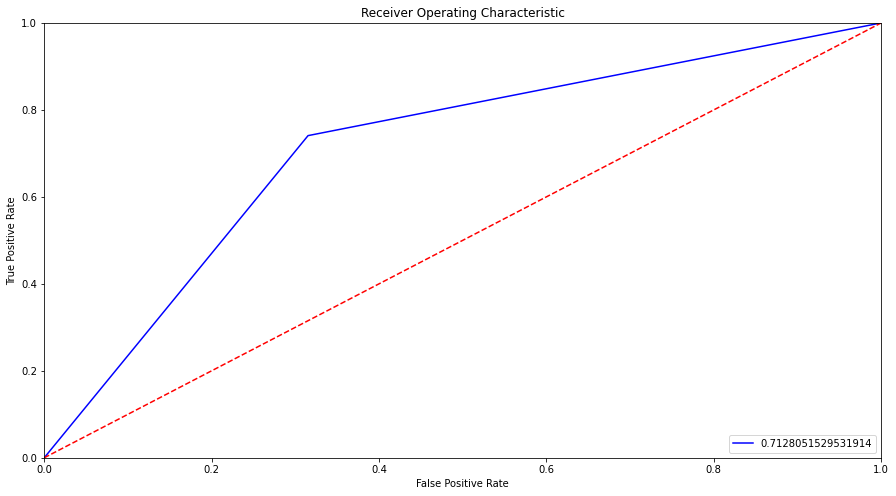

In [89]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

##### evaluate_threshold(0.5)
Sensitivity: 0.28286082474226804<br>
Specificity: 0.9592768444119796<br>
False Positive Rate: 0.040723155588020456

##### evaluate_threshold(0.6)
Sensitivity: 0.1720360824742268<br>
Specificity: 0.9852081811541271<br>
False Positive Rate: 0.0147918188458729

##### evaluate_threshold(0.4)
Sensitivity: 0.41237113402061853<br>
Specificity: 0.9242147552958364<br>
False Positive Rate: 0.07578524470416362

##### evaluate_threshold(0.3)
Sensitivity: 0.5483247422680413<br>
Specificity: 0.8579254930606282<br>
False Positive Rate: 0.1420745069393718

##### evaluate_threshold(0.195)
Sensitivity: 0.7152061855670103<br>
Specificity: 0.7156683710737765<br>
False Positive Rate: 0.28433162892622355

## Conclusion : Logistic Regression is much better performing than other algorithm.